In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the dataset to python environment
df=pd.read_excel('iris.xls')

In [3]:
#show the data structure
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data preprocessing

In [4]:
#checking for null values
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [5]:
#checking the data details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#check the shape of data (no. of rows & columns)
df.shape

(150, 5)

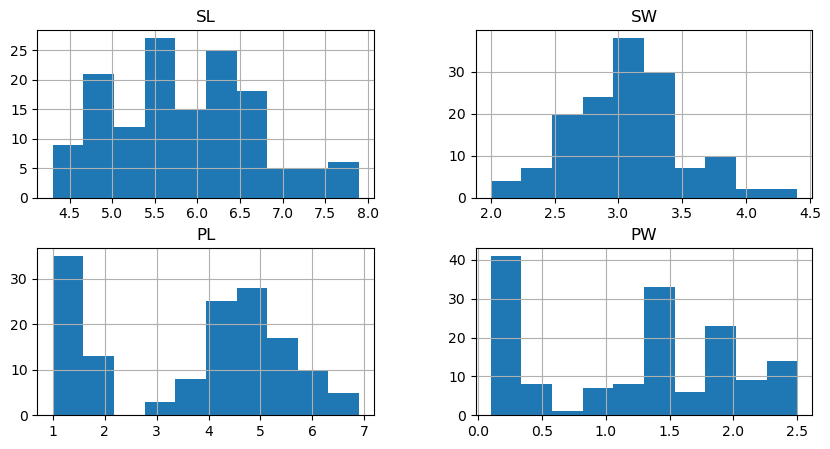

In [7]:
#checking the distribution of each feature
freqgraph=df.select_dtypes(include=['float'])
freqgraph.hist(figsize=(10,5))
plt.show()

In [8]:
#filling the missing values with median
for col in ['SL','SW','PL']:
    df[col] = df[col].fillna(df[col].median())

In [9]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [10]:
#checking for duplicated rows and values
df.duplicated().sum()

3

In [11]:
df[df.duplicated()]

,SL,SW,PL,PW,Classification
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [12]:
# removing the duplicated rows
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

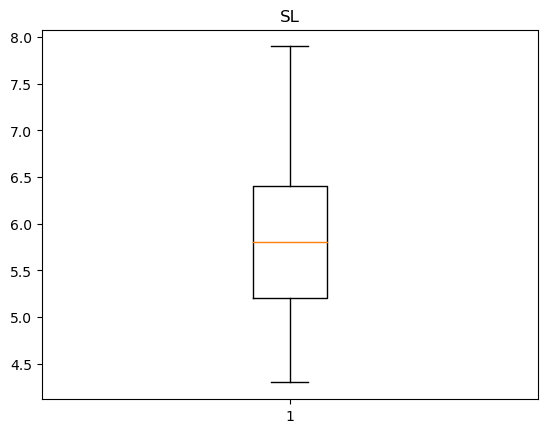

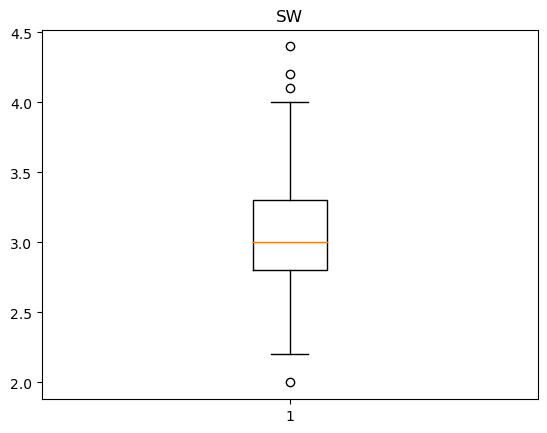

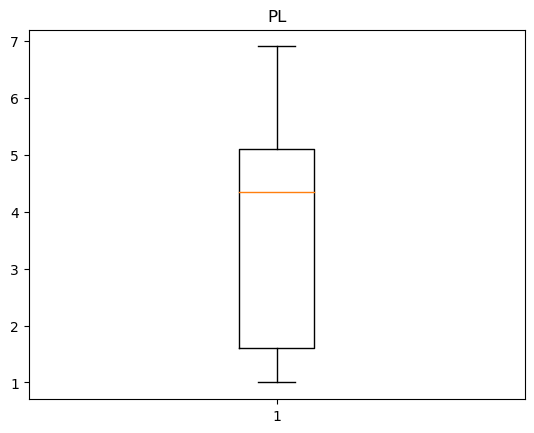

In [14]:
#Checking and plotting outliers
for i in ['SL','SW','PL']:
    plt.figure()
    plt.boxplot(df[i])
    plt.title(i)

In [15]:
# Finding out the outliers
Q1 = np.percentile(df['SW'],25,interpolation='midpoint')
Q2 = np.percentile(df['SW'],50,interpolation='midpoint')
Q3 = np.percentile(df['SW'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.3


In [16]:
df['SW'].median()

3.0

In [17]:
IQR = Q3-Q1
low_lim = Q1 - 1.5*IQR
upp_lim = Q3 + 1.5*IQR

In [18]:
outlier = []
for x in df['SW']:
    if (x>upp_lim or x<low_lim):
        outlier.append(x)

In [19]:
# printing the outlier values
outlier

[4.4, 4.1, 4.2, 2.0]

In [20]:
# checking the location of outlier values 
ind1 = df['SW']<low_lim
df.loc[ind1].index

Int64Index([60], dtype='int64')

In [21]:
ind2 = df['SW']>upp_lim
df.loc[ind2].index

Int64Index([15, 32, 33], dtype='int64')

In [22]:
# Removing the outlier values
df.drop([15, 32, 33, 60], inplace=True)

In [23]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [24]:
#Encoding the Classification column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Classification'] = le.fit_transform(df['Classification'])

In [25]:
print(df)

      SL   SW    PL   PW  Classification
0    5.1  3.5  1.40  0.2               0
1    4.9  3.0  1.40  0.2               0
2    5.8  3.2  1.30  0.2               0
3    4.6  3.1  1.50  0.2               0
4    5.0  3.6  1.40  0.2               0
..   ...  ...   ...  ...             ...
145  6.7  3.0  5.20  2.3               2
146  6.3  2.5  5.00  1.9               2
147  6.5  3.0  4.35  2.0               2
148  6.2  3.4  5.40  2.3               2
149  5.9  3.0  5.10  1.8               2

[143 rows x 5 columns]


In [26]:
#Splitting the data into feature and target. 'Classification' is the target.
y=df['Classification']
x=df.drop(['Classification'],axis=1)

# Logistic Regression

In [27]:
#Splitting the data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [28]:
from sklearn.linear_model import LogisticRegression
#creating instance
clf =LogisticRegression()
#fitting the data into model
model=clf.fit(x_train,y_train)
#prediction
y_pred=model.predict(x_test)

In [29]:
#Finding out the evaluation metrics for Logistic Regression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
acc_log = accuracy_score(y_test,y_pred)
print('Accuracy for Logistic Regression = ',acc_log)
print('Precision for Logistic Regression = ',precision_score(y_test,y_pred, average='micro'))
print('Recall for Logistic Regression = ',recall_score(y_test,y_pred, average='macro'))
print('f1 score for Logistic Regression = ',f1_score(y_test,y_pred, average='macro'))
print('Confusion matrix for Logistic Regression\n',confusion_matrix(y_pred,y_test))

Accuracy for Logistic Regression =  0.8620689655172413
Precision for Logistic Regression =  0.8620689655172413
Recall for Logistic Regression =  0.8613636363636363
f1 score for Logistic Regression =  0.8695906432748538
Confusion matrix for Logistic Regression
 [[ 7  0  0]
 [ 1 10  2]
 [ 0  1  8]]


# kNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    model = classifier.fit(x_train,y_train)
    y_pred_knn = model.predict(x_test)
    acc_knn = accuracy_score(y_test,y_pred_knn)
    metric_k.append(acc_knn)

C:\Users\rejoj\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\rejoj\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [31]:
metric_k

[0.8275862068965517,
 0.896551724137931,
 0.8620689655172413,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.9310344827586207,
 0.896551724137931,
 0.9310344827586207,
 0.896551724137931,
 0.896551724137931,
 0.8620689655172413]

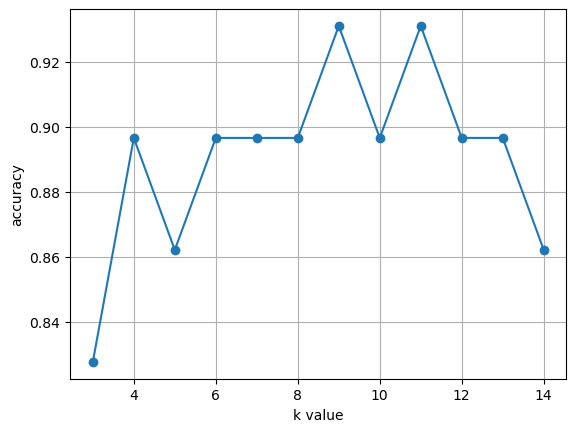

In [32]:
#plotting k value to know the highest value
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [33]:
classifier = KNeighborsClassifier(n_neighbors=9,metric='minkowski',p=2)
model = classifier.fit(x_train,y_train)
y_pred_knn = model.predict(x_test)
acc_knn = accuracy_score(y_test,y_pred_knn)
print('Accuracy for kNN = ',acc_knn)
print('Precision for kNN = ',precision_score(y_test,y_pred_knn, average='micro'))
print('Recall for kNN = ',recall_score(y_test,y_pred_knn, average='micro'))
print('f1 score for kNN = ',f1_score(y_test,y_pred_knn, average='micro'))
print('Confusion matrix\n:',confusion_matrix(y_pred_knn,y_test))

Accuracy for kNN =  0.9310344827586207
Precision for kNN =  0.9310344827586207
Recall for kNN =  0.9310344827586207
f1 score for kNN =  0.9310344827586207
Confusion matrix
: [[ 7  0  0]
 [ 1 11  1]
 [ 0  0  9]]


C:\Users\rejoj\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# SVM

In [34]:
from sklearn.svm import SVC

#creating instance with the model and kernel linear
svmclf = SVC(kernel = 'linear')

#fitting the model
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [35]:
#prediction
y_pred_svm_lin = svmclf.predict(x_test)

In [36]:
#checking and printing the metrics
from sklearn.metrics import accuracy_score,confusion_matrix
acc_svm_lin = accuracy_score(y_test,y_pred_svm_lin)
print('Accuracy for SVM = ',acc_svm_lin)
print('Precision for SVM = ',precision_score(y_test,y_pred_svm_lin, average='micro'))
print('Recall for SVM = ',recall_score(y_test,y_pred_svm_lin, average='micro'))
print('f1 score for SVM = ',f1_score(y_test,y_pred_svm_lin, average='micro'))
print('Confusion matrix\n',confusion_matrix(y_test,y_pred_svm_lin))

Accuracy for SVM =  0.896551724137931
Precision for SVM =  0.896551724137931
Recall for SVM =  0.896551724137931
f1 score for SVM =  0.896551724137931
Confusion matrix
 [[ 8  0  0]
 [ 0 10  1]
 [ 0  2  8]]


In [37]:
#with kernel RBF
from sklearn.svm import SVC
svmclf = SVC(kernel = 'rbf')
svmclf.fit(x_train,y_train)

SVC()

In [38]:
#prediction
y_pred_svm_rbf = svmclf.predict(x_test)

In [39]:
#checking and printing the metrics
acc_svm_rbf = accuracy_score(y_test,y_pred_svm_rbf)
print('Accuracy for SVM with RBF = ', acc_svm_rbf)
print('Precision for SVM with RBF = ',precision_score(y_test,y_pred_svm_rbf, average='micro'))
print('Recall for SVM with RBF = ',recall_score(y_test,y_pred_svm_rbf, average='micro'))
print('f1 score for SVM with RBF = ',f1_score(y_test,y_pred_svm_rbf, average='micro'))
print('Confusion matrix\n',confusion_matrix(y_test,y_pred_svm_rbf))

Accuracy for SVM with RBF =  0.8620689655172413
Precision for SVM with RBF =  0.8620689655172413
Recall for SVM with RBF =  0.8620689655172413
f1 score for SVM with RBF =  0.8620689655172413
Confusion matrix
 [[ 7  1  0]
 [ 0 11  0]
 [ 0  3  7]]


In [40]:
#with kernel Polynomial
from sklearn.svm import SVC
svmclf = SVC(kernel = 'poly')
svmclf.fit(x_train,y_train)

SVC(kernel='poly')

In [41]:
#prediction
y_pred_svm_poly = svmclf.predict(x_test)

In [42]:
#checking and printing the metrics
acc_svm_poly = accuracy_score(y_test,y_pred_svm_poly)
print('Accuracy for SVM with Polynomial = ', acc_svm_poly)
print('Precision for SVM with Polynomial = ',precision_score(y_test,y_pred_svm_poly, average='micro'))
print('Recall for SVM with Polynomial = ',recall_score(y_test,y_pred_svm_poly, average='micro'))
print('f1 score for SVM with Polynomial = ',f1_score(y_test,y_pred_svm_poly, average='micro'))
print('Confusion matrix\n',confusion_matrix(y_test,y_pred_svm_poly))

Accuracy for SVM with Polynomial =  0.896551724137931
Precision for SVM with Polynomial =  0.896551724137931
Recall for SVM with Polynomial =  0.896551724137931
f1 score for SVM with Polynomial =  0.896551724137931
Confusion matrix
 [[ 7  1  0]
 [ 0 10  1]
 [ 0  1  9]]


# Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state = 42)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [44]:
y_pred_dt = dt_clf.predict(x_test)

In [45]:
acc_dt = accuracy_score(y_test,y_pred_dt)
print('Accuracy for Decision Tree = ',acc_dt)
print('Precision for Decision Tree = ',precision_score(y_test,y_pred_dt, average='micro'))
print('Recall for Decision Tree = ',recall_score(y_test,y_pred_dt, average='micro'))
print('f1 score for Decision Tree = ',f1_score(y_test,y_pred_dt, average='micro'))
print('Confusion matrix\n',confusion_matrix(y_test,y_pred_dt))

Accuracy for Decision Tree =  0.896551724137931
Precision for Decision Tree =  0.896551724137931
Recall for Decision Tree =  0.896551724137931
f1 score for Decision Tree =  0.896551724137931
Confusion matrix
 [[ 8  0  0]
 [ 0 10  1]
 [ 0  2  8]]


# Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=42)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [47]:
y_pred_rf = rf_clf.predict(x_test)

In [48]:
acc_rf = accuracy_score(y_test,y_pred_rf)
print('Accuracy for Random Forest = ',acc_rf)
print('Precision for Random Forest = ',precision_score(y_test,y_pred_rf, average='micro'))
print('Recall for Random Forest = ',recall_score(y_test,y_pred_rf, average='micro'))
print('f1 score for Random Forest = ',f1_score(y_test,y_pred_rf, average='micro'))
print('Confusion matrix\n',confusion_matrix(y_test,y_pred_rf))

Accuracy for Random Forest =  0.896551724137931
Precision for Random Forest =  0.896551724137931
Recall for Random Forest =  0.896551724137931
f1 score for Random Forest =  0.896551724137931
Confusion matrix
 [[ 8  0  0]
 [ 0 10  1]
 [ 0  2  8]]


# Find out which classification model gives the best result

In [49]:
#creating an array with the accuracy score of each classification model
arr = [acc_log, acc_knn, acc_svm_lin, acc_svm_rbf, acc_svm_poly, acc_dt, acc_rf]
arr

[0.8620689655172413,
 0.9310344827586207,
 0.896551724137931,
 0.8620689655172413,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931]

In [50]:
#finding the maximum value in the array
m = max(arr)

In [51]:
#Checking out which classification model accuracy is highest and printing the result
if m==acc_log:
    print('Logistic regression gives the best result')
elif m==acc_knn:
    print('kNN gives the best result')
elif m==acc_svm_lin:
    print('SVM with linear kernal gives the best result')
elif m==acc_svm_rbf:
    print('SVM with rbf kernel gives the best result')
elif m==acc_svm_poly:
    print('SVM with polynomial kernel gives the best result')
elif m==acc_dt:
    print('Decision Tree gives the best result')
else: print('Random Forest gives the best result')

kNN gives the best result
